In [26]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean

# Load the data
df = pd.read_csv('/content/fmri_gap_cnn_extracted_features (1).csv')
print("--- Data Head ---")
display(df.head())
print("\n")
print("--- Data Info ---")
display(df.info())
print("\n")

# Separate data by class
unique_labels = df['label'].unique()
dataframes_by_class = {}
for label in unique_labels:
    dataframes_by_class[label] = df[df['label'] == label].copy()

print("--- DataFrames by Class (Head) ---")
for label, class_df in dataframes_by_class.items():
    print(f"DataFrame for label {label}:")
    display(class_df.head())
    print("\n")

# Calculate class centroids
centroids = {}
for label, class_df in dataframes_by_class.items():
    feature_columns = class_df.drop(columns=['SubjectID', 'label'])
    centroids[label] = feature_columns.mean(axis=0)

print("--- Centroids ---")
for label, centroid in centroids.items():
    print(f"Centroid for label {label}:")
    display(centroid)
    print("\n")

# Calculate intraclass spread
spreads = {}
for label, class_df in dataframes_by_class.items():
    feature_columns = class_df.drop(columns=['SubjectID', 'label'])
    spreads[label] = feature_columns.std(axis=0)

print("--- Spreads ---")
for label, spread in spreads.items():
    print(f"Spread for label {label}:")
    display(spread)
    print("\n")

# Calculate interclass distances
# Assuming there are only two classes based on the previous analysis
if len(unique_labels) == 2:
    label_0, label_1 = unique_labels
    centroid_label_0 = centroids[label_0]
    centroid_label_1 = centroids[label_1]

    distance_between_centroids = euclidean(centroid_label_0, centroid_label_1)

    print("--- Interclass Distance ---")
    print(f"Euclidean distance between the centroids of class {label_0} and class {label_1}: {distance_between_centroids}")
else:
    print("More than two classes found. Interclass distance calculation for multiple classes would require pairwise calculations.")

--- Data Head ---


,SubjectID,fmri_feature_1,fmri_feature_2,fmri_feature_3,fmri_feature_4,fmri_feature_5,fmri_feature_6,fmri_feature_7,fmri_feature_8,fmri_feature_9,...,fmri_feature_120,fmri_feature_121,fmri_feature_122,fmri_feature_123,fmri_feature_124,fmri_feature_125,fmri_feature_126,fmri_feature_127,fmri_feature_128,label
0,100206,0.031507,0.000000,0.0,0.181720,0.011149,0.0,0.044901,0.0,0.0,...,0.194321,0.197170,0.000000,0.0,0.000000,0.000000,0.422310,0.0,0.0,1
1,100408,0.000000,0.169900,0.0,0.198820,0.000000,0.0,0.101803,0.0,0.0,...,0.242235,0.187424,0.000000,0.0,0.136092,0.000000,0.419165,0.0,0.0,1
2,100610,0.000000,0.000000,0.0,0.282409,0.000000,0.0,0.024616,0.0,0.0,...,0.341407,0.176159,0.000000,0.0,0.103809,0.000000,0.590535,0.0,0.0,1
3,101107,0.000000,1.167572,0.0,0.145116,0.000000,0.0,0.179147,0.0,0.0,...,0.669784,0.000000,0.036746,0.0,0.648006,0.416407,0.186512,0.0,0.0,1
4,101309,0.004635,0.000000,0.0,0.300191,0.000000,0.0,0.009900,0.0,0.0,...,0.188205,0.196490,0.000000,0.0,0.000000,0.000000,0.530828,0.0,0.0,1




--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Columns: 130 entries, SubjectID to label
dtypes: float64(128), int64(2)
memory usage: 799.4 KB


None



--- DataFrames by Class (Head) ---
DataFrame for label 1:


,SubjectID,fmri_feature_1,fmri_feature_2,fmri_feature_3,fmri_feature_4,fmri_feature_5,fmri_feature_6,fmri_feature_7,fmri_feature_8,fmri_feature_9,...,fmri_feature_120,fmri_feature_121,fmri_feature_122,fmri_feature_123,fmri_feature_124,fmri_feature_125,fmri_feature_126,fmri_feature_127,fmri_feature_128,label
0,100206,0.031507,0.000000,0.0,0.181720,0.011149,0.0,0.044901,0.0,0.0,...,0.194321,0.197170,0.000000,0.0,0.000000,0.000000,0.422310,0.0,0.0,1
1,100408,0.000000,0.169900,0.0,0.198820,0.000000,0.0,0.101803,0.0,0.0,...,0.242235,0.187424,0.000000,0.0,0.136092,0.000000,0.419165,0.0,0.0,1
2,100610,0.000000,0.000000,0.0,0.282409,0.000000,0.0,0.024616,0.0,0.0,...,0.341407,0.176159,0.000000,0.0,0.103809,0.000000,0.590535,0.0,0.0,1
3,101107,0.000000,1.167572,0.0,0.145116,0.000000,0.0,0.179147,0.0,0.0,...,0.669784,0.000000,0.036746,0.0,0.648006,0.416407,0.186512,0.0,0.0,1
4,101309,0.004635,0.000000,0.0,0.300191,0.000000,0.0,0.009900,0.0,0.0,...,0.188205,0.196490,0.000000,0.0,0.000000,0.000000,0.530828,0.0,0.0,1




DataFrame for label 0:


,SubjectID,fmri_feature_1,fmri_feature_2,fmri_feature_3,fmri_feature_4,fmri_feature_5,fmri_feature_6,fmri_feature_7,fmri_feature_8,fmri_feature_9,...,fmri_feature_120,fmri_feature_121,fmri_feature_122,fmri_feature_123,fmri_feature_124,fmri_feature_125,fmri_feature_126,fmri_feature_127,fmri_feature_128,label
351,100307,0.044772,0.000000,0.0,0.270695,0.0,0.0,0.004289,0.0,0.000000,...,0.154517,0.321887,0.0,0.0,0.000000,0.000000,0.549025,0.0,0.025215,0
352,101006,0.022568,0.000000,0.0,0.298641,0.0,0.0,0.022507,0.0,0.000000,...,0.184636,0.269491,0.0,0.0,0.000000,0.000000,0.471555,0.0,0.063687,0
353,101915,0.000000,0.000000,0.0,0.342356,0.0,0.0,0.033472,0.0,0.029349,...,0.198666,0.136251,0.0,0.0,0.000000,0.000000,0.466809,0.0,0.000000,0
354,102311,0.000000,0.000000,0.0,0.276435,0.0,0.0,0.086190,0.0,0.000000,...,0.255346,0.261055,0.0,0.0,0.012163,0.000000,0.519016,0.0,0.044734,0
355,102816,0.000000,0.481849,0.0,0.159506,0.0,0.0,0.129351,0.0,0.000000,...,0.345350,0.050648,0.0,0.0,0.278924,0.042897,0.366034,0.0,0.000000,0




--- Centroids ---
Centroid for label 1:


,0
fmri_feature_1,0.006808
fmri_feature_2,0.052684
fmri_feature_3,0.000000
fmri_feature_4,0.258663
fmri_feature_5,0.009618
...,...
fmri_feature_124,0.079504
fmri_feature_125,0.006045
fmri_feature_126,0.495397
fmri_feature_127,0.000000




Centroid for label 0:


,0
fmri_feature_1,0.019500
fmri_feature_2,0.018526
fmri_feature_3,0.000000
fmri_feature_4,0.304759
fmri_feature_5,0.014198
...,...
fmri_feature_124,0.039340
fmri_feature_125,0.001921
fmri_feature_126,0.540604
fmri_feature_127,0.000000




--- Spreads ---
Spread for label 1:


,0
fmri_feature_1,0.019034
fmri_feature_2,0.132872
fmri_feature_3,0.000000
fmri_feature_4,0.076180
fmri_feature_5,0.023366
...,...
fmri_feature_124,0.099315
fmri_feature_125,0.032758
fmri_feature_126,0.086287
fmri_feature_127,0.000000




Spread for label 0:


,0
fmri_feature_1,0.031312
fmri_feature_2,0.083461
fmri_feature_3,0.000000
fmri_feature_4,0.084431
fmri_feature_5,0.030103
...,...
fmri_feature_124,0.074571
fmri_feature_125,0.019231
fmri_feature_126,0.085108
fmri_feature_127,0.000000




--- Interclass Distance ---
Euclidean distance between the centroids of class 1 and class 0: 0.4342950107264774


Analysis for feature: fmri_feature_1
Mean: 0.0138
Variance: 0.0007


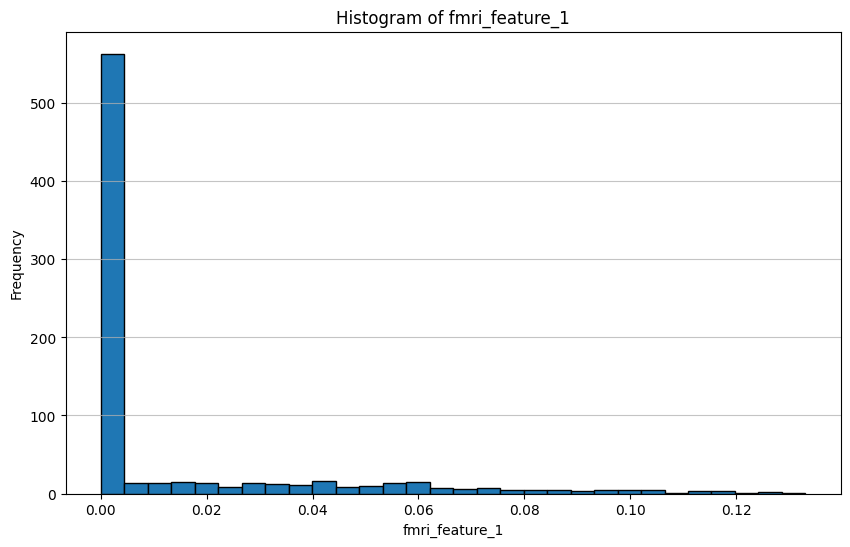

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Select a feature
# Let's choose 'fmri_feature_1' as an example. You can change this to any other feature column.
selected_feature = df['fmri_feature_1']
feature_name = 'fmri_feature_1'

# 2. Calculate mean and variance
feature_mean = np.mean(selected_feature)
feature_variance = np.var(selected_feature)

# 3. Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(selected_feature, bins=30, edgecolor='black') # You can adjust the number of bins
plt.title(f'Histogram of {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# 4. Display results
print(f"Analysis for feature: {feature_name}")
print(f"Mean: {feature_mean:.4f}")
print(f"Variance: {feature_variance:.4f}")
plt.show()

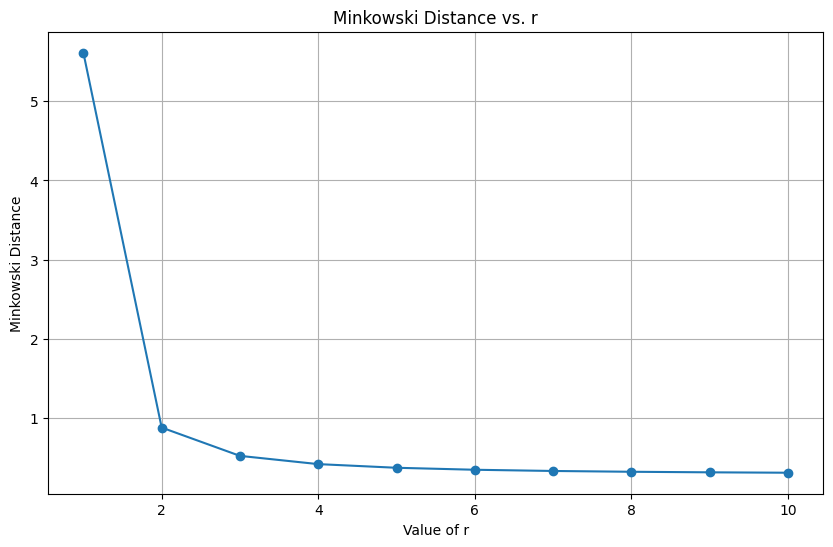

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# 1. Select two feature vectors
# select the first two rows as example feature vectors
# We will drop 'SubjectID' and 'label' columns as they are not features.
feature_vector_1 = df.iloc[0].drop(['SubjectID', 'label']).values
feature_vector_2 = df.iloc[1].drop(['SubjectID', 'label']).values

# 2. Calculate Minkowski distances for different r and 3. Store distances
r_values = range(1, 11)
distances = []
for r in r_values:
    distance = minkowski(feature_vector_1, feature_vector_2, r)
    distances.append(distance)

# 4. Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('Value of r')
plt.ylabel('Minkowski Distance')
plt.grid(True)

# 5. Display results
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(columns=['SubjectID', 'label'])
y = df['label']

# Divide the dataset into training and test sets
# Setting test_size to 0.25 means 25% of the data will be in the test set, and 75% in the training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (590, 128)
Shape of X_test: (197, 128)
Shape of y_train: (590,)
Shape of y_test: (197,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Train a kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

print("kNN classifier with k=3 trained successfully!")

kNN classifier with k=3 trained successfully!


In [31]:
# Test the accuracy of the kNN classifier
accuracy = knn_classifier.score(X_test, y_test)

print(f"Accuracy of the kNN classifier on the test set: {accuracy:.4f}")

Accuracy of the kNN classifier on the test set: 0.6802


In [32]:
# Select a single test vector from the test set (e.g., the first one)
test_vector = X_test.iloc[[0]]

# Use the predict() function to get the class prediction for the test vector
predicted_class = knn_classifier.predict(test_vector)

# Display the original test vector and the predicted class
print("Original test vector:")
display(test_vector)
print(f"\nPredicted class for this test vector: {predicted_class[0]}")

Original test vector:


,fmri_feature_1,fmri_feature_2,fmri_feature_3,fmri_feature_4,fmri_feature_5,fmri_feature_6,fmri_feature_7,fmri_feature_8,fmri_feature_9,fmri_feature_10,...,fmri_feature_119,fmri_feature_120,fmri_feature_121,fmri_feature_122,fmri_feature_123,fmri_feature_124,fmri_feature_125,fmri_feature_126,fmri_feature_127,fmri_feature_128
536,0.012072,0.0,0.0,0.531733,0.0,0.0,0.0,0.030731,0.0,0.144788,...,0.096444,0.161139,0.424776,0.0,0.0,0.0,0.0,0.759871,0.0,0.009802



Predicted class for this test vector: 0


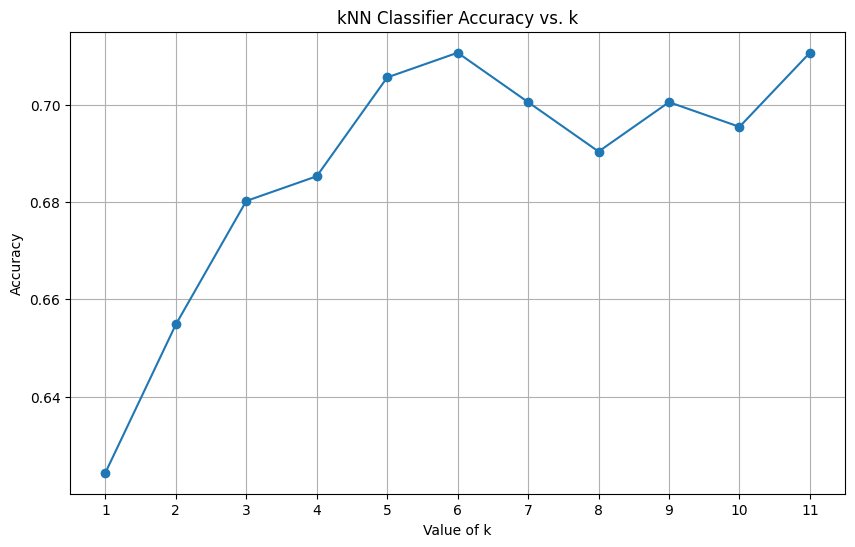

Accuracy for each k:
k = 1: 0.6244
k = 2: 0.6548
k = 3: 0.6802
k = 4: 0.6853
k = 5: 0.7056
k = 6: 0.7107
k = 7: 0.7005
k = 8: 0.6904
k = 9: 0.7005
k = 10: 0.6954
k = 11: 0.7107

Comparison:
Accuracy for k=1: 0.6244
Accuracy for k=3: 0.6802


In [33]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define a range of k values to test
k_values = range(1, 12)  # Test k from 1 to 11

# List to store accuracy for each k
accuracies = []

# Train kNN classifier and calculate accuracy for each k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('kNN Classifier Accuracy vs. k')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print accuracies for each k
print("Accuracy for each k:")
for k, accuracy in zip(k_values, accuracies):
    print(f"k = {k}: {accuracy:.4f}")

# Compare results for k=1 and k=3
print("\nComparison:")
accuracy_k1 = accuracies[k_values.index(1)]
accuracy_k3 = accuracies[k_values.index(3)]
print(f"Accuracy for k=1: {accuracy_k1:.4f}")
print(f"Accuracy for k=3: {accuracy_k3:.4f}")

In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the training set
y_train_pred = knn_classifier.predict(X_train)

# Make predictions on the test set
y_test_pred = knn_classifier.predict(X_test)

# Evaluate performance on the training set
print("--- Training Set Performance ---")
print("Confusion Matrix:")
display(confusion_matrix(y_train, y_train_pred))
print("\nPrecision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1-Score:", f1_score(y_train, y_train_pred, average='weighted'))

print("\n--- Test Set Performance ---")
print("Confusion Matrix:")
display(confusion_matrix(y_test, y_test_pred))
print("\nPrecision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_test_pred, average='weighted'))

# Inference about model learning outcome
print("\n--- Model Learning Outcome ---")
# We need to compare performance on training and test sets to infer learning outcome.
# A significant difference (training performance much higher than test performance)
# usually indicates overfitting. Similar performance suggests a good fit or underfitting.
# Underfitting is typically characterized by low performance on both sets.

train_accuracy = knn_classifier.score(X_train, y_train)
test_accuracy = knn_classifier.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.1: # A difference of more than 0.1 as a heuristic for overfitting
    print("Inference: The model might be overfitting. Performance on the training set is significantly higher than on the test set.")
elif test_accuracy < 0.6: # A heuristic for underfitting (accuracy below 60%)
     print("Inference: The model might be underfitting. Performance on both training and test sets is relatively low.")
else:
    print("Inference: The model seems to be reasonably regular fit. Performance on training and test sets is comparable.")

--- Training Set Performance ---
Confusion Matrix:


array([[235,  90],
       [ 77, 188]])


Precision: 0.718644575864732
Recall: 0.7169491525423729
F1-Score: 0.7174491484017523

--- Test Set Performance ---
Confusion Matrix:


array([[86, 25],
       [32, 54]])


Precision: 0.7090513462503961
Recall: 0.7106598984771574
F1-Score: 0.7089446097980223

--- Model Learning Outcome ---
Training Accuracy: 0.7169
Test Accuracy: 0.7107
Inference: The model seems to be reasonably regular fit. Performance on training and test sets is comparable.
